In [83]:
#Exploratory Data Analysis (EDA)
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [84]:
#Reading the dataset
train_df = pd.read_csv('titanic\\train.csv')
test_df = pd.read_csv('titanic\\test.csv')
gender_submission_df = pd.read_csv('titanic\\gender_submission.csv')

In [85]:
#Summary of the df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#Summary statistics
#To better understand the numeric data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

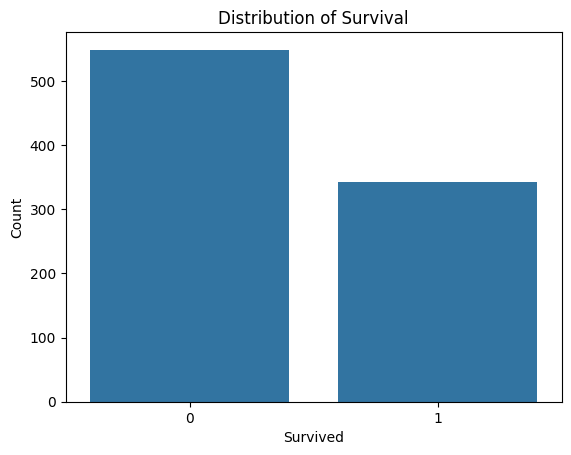

In [88]:
#Plot the distribution of the target variable
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

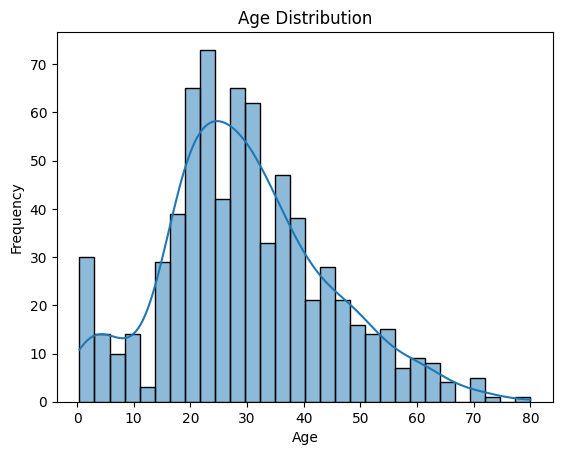

In [89]:
# Plot the age distribution
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


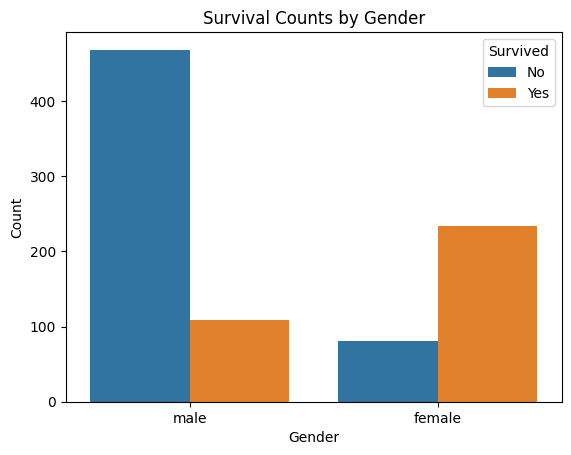

In [90]:
#Plot survival counts by gender
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

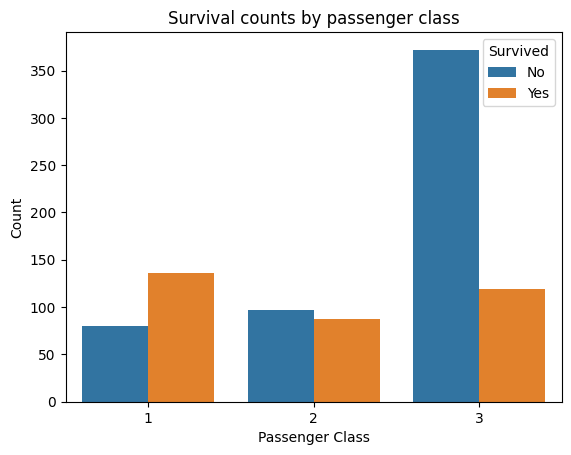

In [91]:
# Plot survival counts by passenger class
sns.countplot (x='Pclass', hue='Survived', data=train_df)
plt.title('Survival counts by passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [92]:
#Data Preprocessing
# Viewing missing values
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:
#Handling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

train_df.isnull().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_28276\662293107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_28276\662293107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

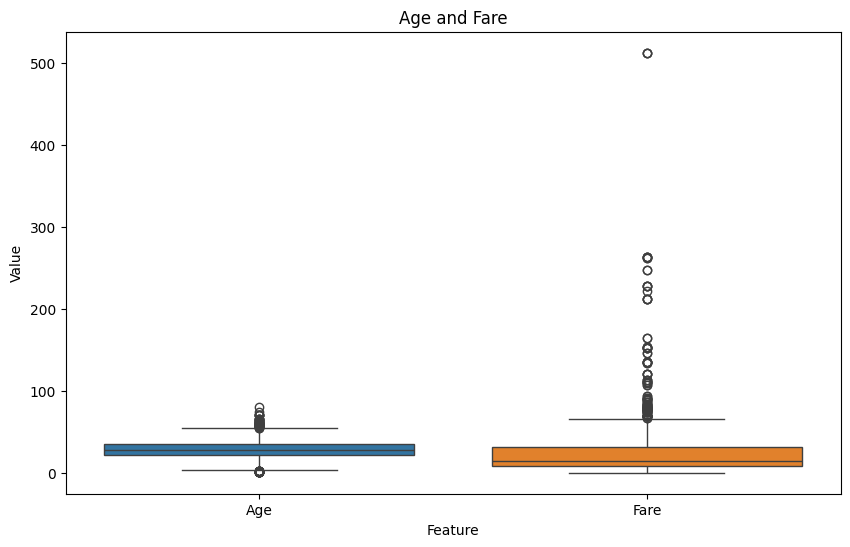

In [94]:
# Dealing with outliers
numeric_cols = ['Age', 'Fare']
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[numeric_cols])
plt.title('Age and Fare')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [95]:
# Handling outliers using Z-score
def handle_outliers_zscore(df, columns):
    for col in columns:
        # Calculate z-score for each data point
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        
        # Define threshold for outliers (e.g., z-score > 3 or < -3)
        threshold = 3
        
        # Replace outliers with NaN
        df[col] = np.where(np.abs(z_scores) > threshold, np.nan, df[col])
        
        # Impute NaN values with median
        df[col] = df[col].fillna(df[col].median())        
    return df

# Apply outlier treatment using z-score to 'age' and 'fare' columns
titanic = handle_outliers_zscore(train_df, ['Age', 'Fare'])

In [96]:
# Normalization - Min-max normalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming train_df is your original DataFrame
min_max = MinMaxScaler()

# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numeric_columns] = min_max.fit_transform(train_df[numeric_columns])
# Fit the scaler to the numeric data and transform it
# df_numeric_min_max = pd.DataFrame(min_max.fit_transform(df_numeric), columns=numeric_columns)

# Display the normalized numeric DataFrame
# print(df_numeric_min_max.head())


In [97]:
#One-hot encoding
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
train_df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.329064,0.125,0.0,0.043975,False,True,False,False,True
1,1.0,0.0,0.573041,0.125,0.0,0.432369,True,False,True,False,False
2,1.0,1.0,0.390058,0.000,0.0,0.048069,True,False,False,False,True
3,1.0,0.0,0.527295,0.125,0.0,0.322078,True,False,False,False,True
4,0.0,1.0,0.527295,0.000,0.0,0.048827,False,True,False,False,True


In [98]:
# Define features and target
X = train_df_encoded.drop(columns=['Survived'])
y = train_df_encoded['Survived']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [99]:
# %% Hyperparameter tuning with GridSearchCV for SVM
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear']
}

svm_model = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc', error_score='raise')
grid_search_svm.fit(X_train, y_train)

# Best parameters
best_params_svm = grid_search_svm.best_params_
print("Best Parameters:", best_params_svm)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [100]:
# %% Train the best SVM model and make predictions
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)

# %% Evaluate the model using AUC scores
y_train_best_pred_svm = best_svm_model.predict_proba(X_train)[:, 1]
y_val_best_pred_svm = best_svm_model.predict_proba(X_val)[:, 1]
y_test_best_pred_svm = best_svm_model.predict_proba(X_test)[:, 1]

In [101]:
train_best_auc_svm = roc_auc_score(y_train, y_train_best_pred_svm)
val_best_auc_svm = roc_auc_score(y_val, y_val_best_pred_svm)
test_best_auc_svm = roc_auc_score(y_test, y_test_best_pred_svm)

print(f"Training AUC Score: {train_best_auc_svm*100:.2f}%")
print(f"Validation AUC Score: {val_best_auc_svm*100:.2f}%")
print(f"Testing AUC Score: {test_best_auc_svm*100:.2f}%")

Training AUC Score: 81.97%
Validation AUC Score: 86.81%
Testing AUC Score: 79.87%
